SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Accuracy on Test dataset by the combined model: 100.0


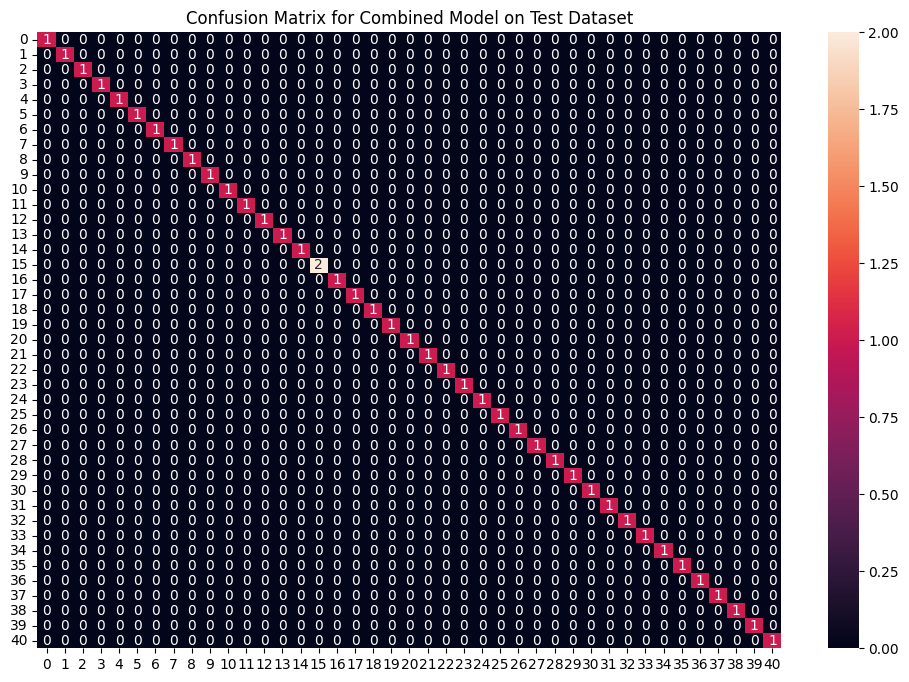

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'F'}


In [12]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)
# Reading and preprocessing data
DATA_PATH = "D:/python/Training1.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Encoding target variable
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Initialize models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# Cross-validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    print("=" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

# Training models
final_rf_model = RandomForestClassifier(random_state=18)
final_rf_model.fit(X_train, y_train)

final_nb_model = GaussianNB()
final_nb_model.fit(X_train, y_train)

final_svm_model = SVC()
final_svm_model.fit(X_train, y_train)

# Reading test data
test_data = pd.read_csv("D:/python/Testing1.csv").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making predictions
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Combining predictions
from statistics import mode

final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

# Evaluation
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100}")

# Confusion matrix for combined model
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

# Function to predict disease based on symptoms
symptoms = X.columns.values
symptom_index = {symptom.capitalize(): index for index, symptom in enumerate(symptoms)}
predictions_classes = encoder.classes_

def predictDisease(symptoms_str):
    symptoms_list = symptoms_str.split(",")
    input_data = [0] * len(symptom_index)
    for symptom in symptoms_list:
        if symptom.capitalize() in symptom_index:
            input_data[symptom_index[symptom.capitalize()]] = 1

    input_data = np.array(input_data).reshape(1, -1)

    rf_prediction = predictions_classes[final_rf_model.predict(input_data)[0]]
    nb_prediction = predictions_classes[final_nb_model.predict(input_data)[0]]
    svm_prediction = predictions_classes[final_svm_model.predict(input_data)[0]]

    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]

    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }

    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash"))
